In [1]:
import psutil
import matplotlib.pyplot as plt
from datetime import datetime
import time

# For track overall system usage
cpu_usages = []
mem_usages = []
power_usages = []

# For track per process usage
process_energy = {}
timeInMin = 30

In [2]:
# Monitoring System Resource Utilization
# System and process usage
for i in range(timeInMin):

    # Get overall system usage
    cpu_percent = psutil.cpu_percent()
    cpu_usages.append(cpu_percent)
    mem_percent = psutil.virtual_memory().percent
    mem_usages.append(mem_percent)

    battery = psutil.sensors_battery()
    if battery:
        power_usages.append(battery.power_plugged)
    else:
        power_usages.append(None)

    # Get per process usage
    for proc in psutil.process_iter(['pid', 'name', 'username']): #pid = process ID

        try:
            cpu_percent = proc.cpu_percent()
        except psutil.NoSuchProcess:
            continue
        except psutil.AccessDenied:
            continue

        try:
            mem_percent = proc.memory_percent()
        except psutil.NoSuchProcess:
            continue
        except psutil.AccessDenied:
            continue

        process_energy.setdefault(proc.info['name'], {
            'cpu_usage': 0,
            'mem_usage': 0,
            'cpu_samples': 0,
            'mem_samples': 0,
            'power_consumption_mw': 0  # power consumption variable
        })

        process_energy[proc.info['name']]['cpu_usage'] += cpu_percent
        process_energy[proc.info['name']]['mem_usage'] += mem_percent
        process_energy[proc.info['name']]['cpu_samples'] += 1 # updating the count of CPU samples for each proces
        process_energy[proc.info['name']]['mem_samples'] += 1 # updating the count of memory samples for the each process.

    time.sleep(60)


In [3]:
# Estimating Power Consumption
# Process overall data
avg_cpu = sum(cpu_usages) / len(cpu_usages)
avg_mem = sum(mem_usages) / len(mem_usages)
avg_power = sum(power_usages) / len(power_usages)

# Aggregating Data for Analysis:
# Process per process data
for proc in process_energy:
    process_energy[proc]['cpu_usage'] /= process_energy[proc]['cpu_samples']
    process_energy[proc]['mem_usage'] /= process_energy[proc]['mem_samples']


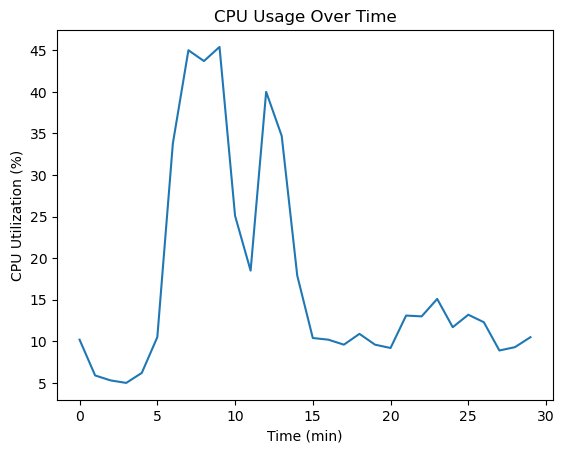

In [4]:
# Visualization Using Matplotlib
# Visualize overall system usage
plt.plot(cpu_usages)
plt.title('CPU Usage Over Time')
plt.xlabel('Time (min)')
plt.ylabel('CPU Utilization (%)')
plt.show()


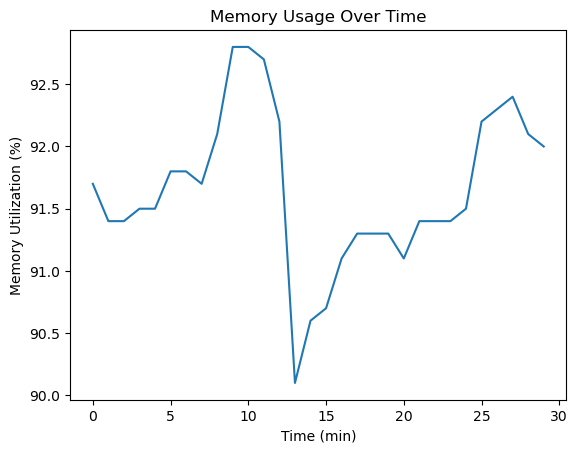

In [5]:

plt.plot(mem_usages)
plt.title('Memory Usage Over Time')
plt.xlabel('Time (min)')
plt.ylabel('Memory Utilization (%)')
plt.show()


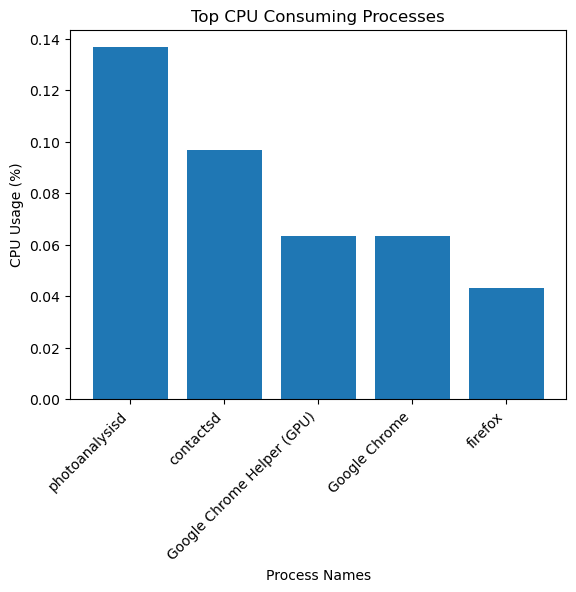

In [20]:


# Visualize per process usage
top_cpu = sorted(process_energy.items(), key=lambda x: x[1]['cpu_usage'], reverse=True)[:5]
process_names = [item[0] for item in top_cpu]
cpu_usage = [item[1]['cpu_usage'] for item in top_cpu]

plt.bar(process_names, cpu_usage)
plt.title('Top CPU Consuming Processes')
plt.xlabel('Process Names')
plt.ylabel('CPU Usage (%)')
plt.xticks(rotation=45, ha='right')  # Rotating x-axis labels for readability
plt.show()



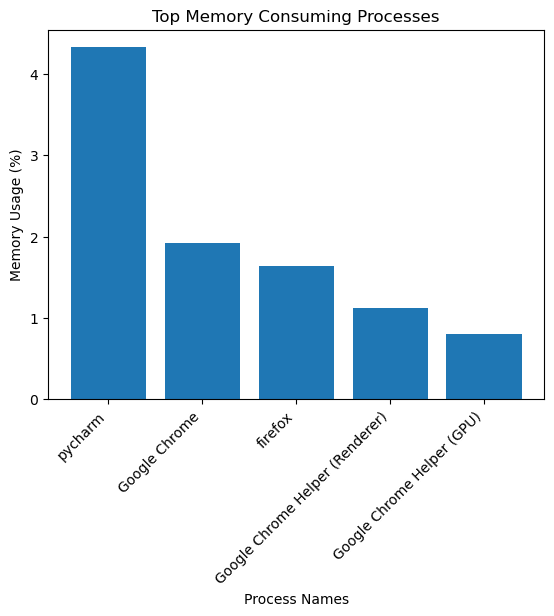

In [21]:

top_mem = sorted(process_energy.items(), key=lambda x: x[1]['mem_usage'], reverse=True)[:5]
process_names = [item[0] for item in top_mem]
mem_usage = [item[1]['mem_usage'] for item in top_mem]

plt.bar(process_names, mem_usage)
plt.title('Top Memory Consuming Processes')
plt.xlabel('Process Names')
plt.ylabel('Memory Usage (%)')
plt.xticks(rotation=45, ha='right')  # Rotating x-axis labels for readability
plt.show()


In [9]:
# Automated Reports
# Generate usage report
now = datetime.now().strftime("%Y-%m-%d %H:%M")
report = f"""
Energy Consumption Analysis Report - {now}

Overall System Usage:
Average CPU utilization: {avg_cpu}%
Average memory utilization: {avg_mem}%

"""


In [10]:

if all(x is not None for x in power_usages):
    report += f"Average power usage: {avg_power} mW\n"
else:
    report += "Power source status unknown.\n"

report += f"\nTop Energy Consuming Processes (CPU):\n{top_cpu}"

report += f"\nTop Energy Consuming Processes (Memory):\n{top_mem}"

print(report)



Energy Consumption Analysis Report - 2023-11-30 15:02

Overall System Usage:
Average CPU utilization: 17.14%
Average memory utilization: 91.65333333333332%

Average power usage: 1.0 mW

Top Energy Consuming Processes (CPU):
[('photoanalysisd', {'cpu_usage': 0.1366666666666667, 'mem_usage': 0.24831136067708334, 'cpu_samples': 30, 'mem_samples': 30, 'power_consumption_mw': 0}), ('contactsd', {'cpu_usage': 0.09666666666666672, 'mem_usage': 0.322723388671875, 'cpu_samples': 30, 'mem_samples': 30, 'power_consumption_mw': 0}), ('Google Chrome Helper (GPU)', {'cpu_usage': 0.06333333333333335, 'mem_usage': 0.7979361216227213, 'cpu_samples': 30, 'mem_samples': 30, 'power_consumption_mw': 0}), ('Google Chrome', {'cpu_usage': 0.06333333333333334, 'mem_usage': 1.927188237508138, 'cpu_samples': 30, 'mem_samples': 30, 'power_consumption_mw': 0}), ('firefox', {'cpu_usage': 0.043333333333333335, 'mem_usage': 1.6372426350911458, 'cpu_samples': 30, 'mem_samples': 30, 'power_consumption_mw': 0})]
Top En

In [11]:

# Save report to file
with open('/Users/pavankalyandosa/Documents/consumption_report.txt', 'w') as f:
  f.write(report)


In [12]:


import psutil
from datetime import datetime
import time
import matplotlib.pyplot as plt

# Estimate power consumption based on CPU and memory usage
for proc_name, data in process_energy.items():
    cpu_usage = data['cpu_usage'] / data['cpu_samples']
    mem_usage = data['mem_usage'] / data['mem_samples']

    # This is a simple linear combination of CPU and memory usage
    power_consumption_mw = (cpu_usage + mem_usage) * 10

    data['power_consumption_mw'] = power_consumption_mw

# Displaying the results
for proc_name, data in process_energy.items():
    print(f"Process: {proc_name}")
    print(f"Estimated Power Consumption (mW): {data['power_consumption_mw']:.2f}")

# Dictionary to store total power consumption for each application
total_power_consumption = {}

# Iterating through the process_energy dictionary and sum up power consumption
for proc_name, data in process_energy.items():
    power_consumption_mw = data['power_consumption_mw']

    # If the process name is not already in the dictionary, add it with the power consumption
    if proc_name not in total_power_consumption:
        total_power_consumption[proc_name] = power_consumption_mw
    else:
        # If the process name is already in the dictionary, add the power consumption to the existing total
        total_power_consumption[proc_name] += power_consumption_mw

# Sort the applications by total power consumption
sorted_total_power = sorted(total_power_consumption.items(), key=lambda x: x[1], reverse=True)

# Displaying the total power consumption for each application
for proc_name, total_power in sorted_total_power:
    print(f"Application: {proc_name}")
    print(f"Total Power Consumption (mW): {total_power:.2f}")



Process: loginwindow
Estimated Power Consumption (mW): 0.10
Process: distnoted
Estimated Power Consumption (mW): 0.01
Process: cfprefsd
Estimated Power Consumption (mW): 0.01
Process: UserEventAgent
Estimated Power Consumption (mW): 0.03
Process: knowledge-agent
Estimated Power Consumption (mW): 0.06
Process: CoreServicesUIAgent
Estimated Power Consumption (mW): 0.04
Process: universalaccessd
Estimated Power Consumption (mW): 0.03
Process: WindowManager
Estimated Power Consumption (mW): 0.07
Process: talagent
Estimated Power Consumption (mW): 0.03
Process: Dock
Estimated Power Consumption (mW): 0.05
Process: lsd
Estimated Power Consumption (mW): 0.03
Process: ControlCenter
Estimated Power Consumption (mW): 0.12
Process: SystemUIServer
Estimated Power Consumption (mW): 0.04
Process: Finder
Estimated Power Consumption (mW): 0.20
Process: com.apple.sbd
Estimated Power Consumption (mW): 0.02
Process: BackgroundTaskManagementAgent
Estimated Power Consumption (mW): 0.03
Process: csnameddatad

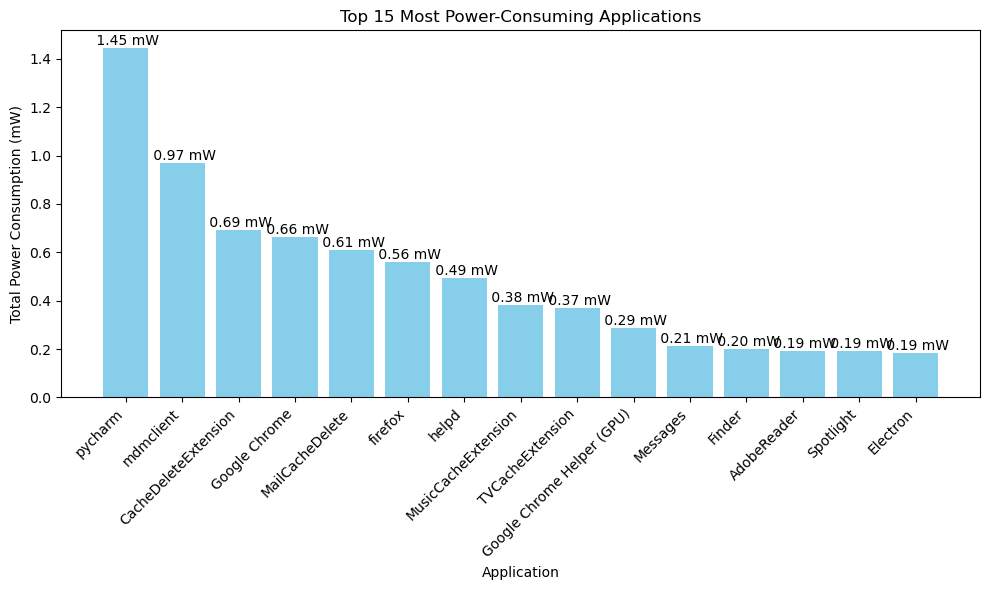

In [13]:
# Sort applications by power consumption (we are sorting only top 15)
sorted_apps = sorted(total_power_consumption.items(), key=lambda x: x[1], reverse=True)[:15]

# Extracting sorted application names and total power consumption values
app_names = [app[0] for app in sorted_apps]
power_consumption_values = [app[1] for app in sorted_apps]

# create a vertical bar chart
plt.figure(figsize=(10, 6))  # You can adjust the figure size as needed
plt.bar(app_names, power_consumption_values, color='skyblue')
plt.ylabel('Total Power Consumption (mW)')
plt.xlabel('Application')
plt.title('Top 15 Most Power-Consuming Applications')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Adding power consumption values on top of the bars
for i, value in enumerate(power_consumption_values):
    plt.text(i, value, f' {value:.2f} mW', ha='center', va='bottom', color='black', fontsize=10)

plt.tight_layout()
plt.show()

In [14]:
# Calculating the overall power consumption
overall_power_consumption = sum(total_power_consumption.values())

# the overall power consumption
print(f"Overall Power Consumption: {overall_power_consumption:.2f} mW")

Overall Power Consumption: 17.78 mW


In [1]:
import sys
import psutil
import matplotlib.pyplot as plt  # Import the matplotlib library

In [8]:
# Function to display system memory information (in MB)
def display_system_memory():
    memory_info = psutil.virtual_memory()
    total_memory_mb = memory_info.total / (1024 ** 2)
    
    # Calculating used and available memory
    used_memory_mb = (memory_info.total - memory_info.available) / (1024 ** 2)
    available_memory_mb = memory_info.available / (1024 ** 2)

    print("System Memory Information:")
    print(f"Total Memory: {total_memory_mb:.2f} MB")
    print(f"Available Memory: {available_memory_mb:.2f} MB")
    print(f"Used Memory: {used_memory_mb:.2f} MB")

In [11]:
# Function to plot a bar graph of system memory (in MB)
def plot_system_memory():
    memory_info = psutil.virtual_memory()
    total_memory_mb = memory_info.total / (1024 ** 2)
    
    # Calculating used and available memory
    used_memory_mb = (memory_info.total - memory_info.available) / (1024 ** 2)
    available_memory_mb = memory_info.available / (1024 ** 2)

    labels = ['Total Memory', 'Available Memory', 'Used Memory']
    values = [total_memory_mb, available_memory_mb, used_memory_mb]

    plt.figure(figsize=(8, 6))
    plt.bar(labels, values, color=['blue', 'green', 'red'])
    plt.ylabel('Memory (MB)')
    plt.title('System Memory Information')
    plt.show()

In [12]:
# Displaying system memory information
display_system_memory()

System Memory Information:
Total Memory: 16384.00 MB
Available Memory: 1029.20 MB
Used Memory: 15354.80 MB


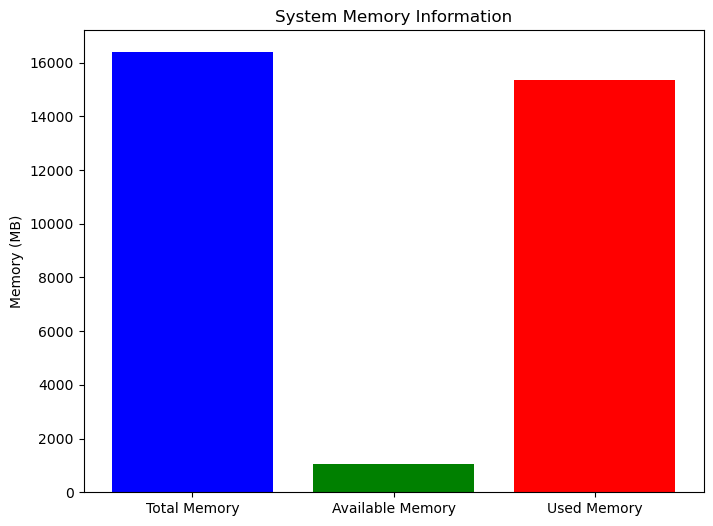

In [13]:
# Plotting system memory information
plot_system_memory()